<a href="https://colab.research.google.com/github/Ch-Chand/LLM-Projects/blob/main/01)_Review_Classification_using_Pre_trained_Bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Modules

In [1]:
!pip -q install datasets
!pip -q install transformers
!pip -q install py7zr

# Loading Data

In [2]:
from datasets import load_dataset

# Loading Data
dataset_name = "imdb"
data = load_dataset(dataset_name)

In [3]:
rec = 5
for i, j in zip(data['train']["text"], data['train']["label"]):
  print("LABEL: ", j)
  print("REVIEW: ", i)
  rec -= 1

  if rec == 0:
    break

LABEL:  0
REVIEW:  I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few a

# Loading Tokenizer & Model

In [4]:
from transformers import AutoTokenizer
from transformers import TFAutoModelForSequenceClassification

In [5]:
model_name = "lvwerra/distilbert-imdb"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = TFAutoModelForSequenceClassification.from_pretrained(model_name, from_pt=True)

All PyTorch model weights were used when initializing TFDistilBertForSequenceClassification.

All the weights of TFDistilBertForSequenceClassification were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


# Prediction with Pre-Trained Model

### Single Record Prediction

In [9]:
text = data["test"]["text"][0]
text_embeddings = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=512)
text_embeddings

{'input_ids': <tf.Tensor: shape=(1, 339), dtype=int32, numpy=
array([[  101,  1045,  2293, 16596,  1011, 10882,  1998,  2572,  5627,
         2000,  2404,  2039,  2007,  1037,  2843,  1012, 16596,  1011,
        10882,  5691,  1013,  2694,  2024,  2788,  2104, 11263, 25848,
         1010,  2104,  1011, 12315,  1998, 28947,  1012,  1045,  2699,
         2000,  2066,  2023,  1010,  1045,  2428,  2106,  1010,  2021,
         2009,  2003,  2000,  2204,  2694, 16596,  1011, 10882,  2004,
        17690,  1019,  2003,  2000,  2732, 10313,  1006,  1996,  2434,
         1007,  1012, 10021,  4013,  3367, 20086,  2015,  1010, 10036,
        19747,  4520,  1010, 25931,  3064, 22580,  1010,  1039,  2290,
         2008,  2987,  1005,  1056,  2674,  1996,  4281,  1010,  1998,
        16267,  2028,  1011,  8789,  3494,  3685,  2022,  9462,  2007,
         1037,  1005, 16596,  1011, 10882,  1005,  4292,  1012,  1006,
         1045,  1005,  1049,  2469,  2045,  2024,  2216,  1997,  2017,
         2041, 

In [10]:
output = model(text_embeddings)
output.logits

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[ 2.3124855, -2.7315028]], dtype=float32)>

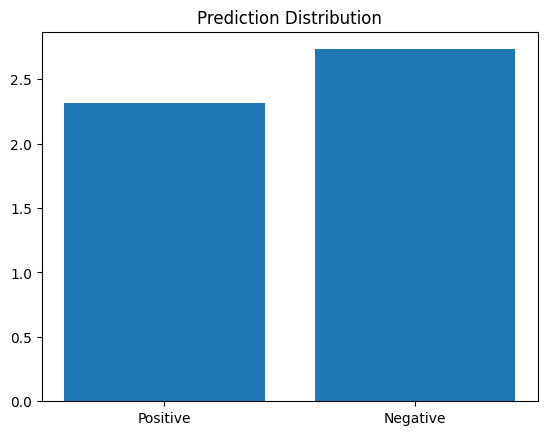

In [11]:
import matplotlib.pyplot as plt
plt.bar(["Positive", "Negative"], [abs(output.logits[0][0]), abs(output.logits[0][1])])
plt.title("Prediction Distribution")
plt.show()

### Multiple Record Prediction

REVIEW Sometimes, changes to novels when they're made into films are not only necessary, but a good thing. However, in the case of Northanger Abbey, it's a very, very bad thing. Not only is the story itself ripped to shreds, but the satire is almost completely absent from the film, and it's mixture of romance and intrigue doesn't even touch upon the biting commentary that Austen put into her work. It fails to be amusing or satirical at all, and instead turns the character's fascination with her fantasy world into mostly a drama.<br /><br />This affects the romance as well. It's meandering and aimless. Chemistry and interest are never established. The reasons Tilney is attracted to Catherine are completely absent from the film, leaving the audience to wonder what it is he sees in her at all.<br /><br />Hopefully some day soon, we'll get a more faithful version if Austen's satire.


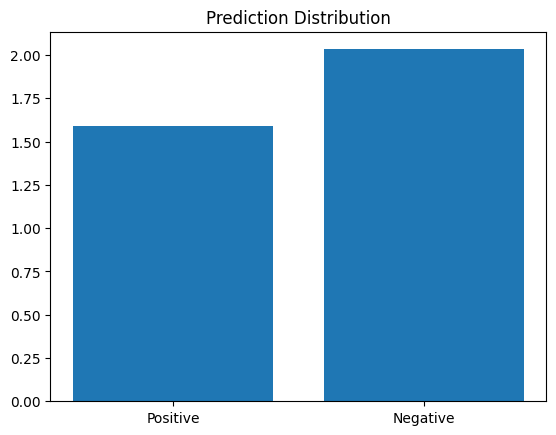

REVIEW After watching Tipping the Velvet by Sarah waters i decided to watch Fingersmith, the characters were just as good in both performances, though missing Rachael Stirling in the adaptation of Fingersmith.<br /><br />The story line overall was of a good choice, the twisting and the unravelling of the characters were amazing! Excellent watch only missing Rachael Stirling!<br /><br />If you do enjoy the romance of two girls this isn't one of the best films to watch. <br /><br />It takes on a different spin from Tipping The Velvet but just as good. <br /><br />Would recommend it to everyone!


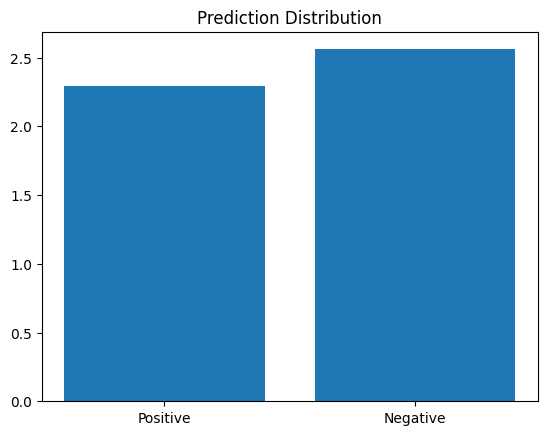

REVIEW In efforts to make a somewhat comedic yet serious movie about the art of growing marijuana, Stephen Gyllenhaal (director) fell a few bong rips short of a good movie. While the cast is nothing short of amazing, this movie is extremely hard to sit through. The acting of Billy Bob Thornton, Ryan Phillipe, Jon Bon Jovi, Hank Azaria, and Kelly Lynch couldn't even save this movie from failure. It would be wiser to flush three single dollar bills down the toilet then to check this movie out at the local video store.<br /><br />


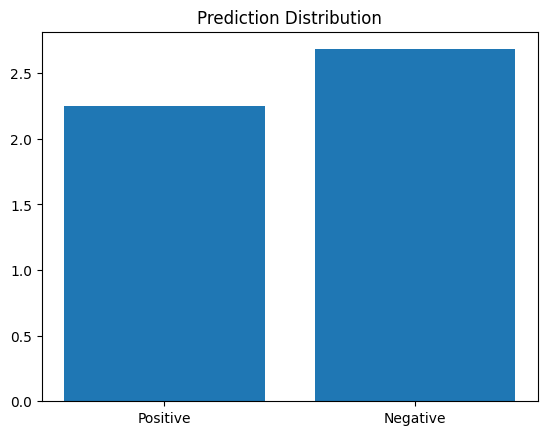

REVIEW The music is by Stravinsky (and not by stupid incompetent Philip Glass) and was written ten years before glass' unfortunate birth. The staging is simply extraordinary. The narrative in Japanese adds a threatening quality and intensity that the Latin version does not have. cf. Terzieff's version. The giant heads and hands are totally justified by the mythic aspect of the tale. The props and make up used for the plague are simply spot on. It's Taymor's best work. The singers are very good, especially Terfel. Langridge is quite moving and clean, and Norman finds the right expression, and her beauty is magnified here and finds its right place: larger than life. Simply a must.


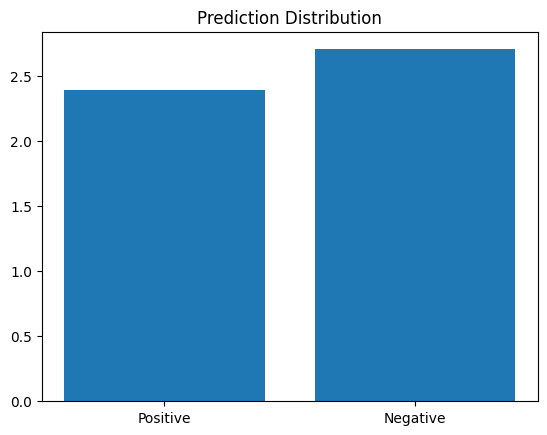

REVIEW Exceptionally bad! I don't expect much from Garcia since he is one of the most overrated actors today but Keaton really should have known this movie would suck and gotten out while he could (not that I'm especially fond of him but hey, he did batman).<br /><br />In one scene Keaton is transported to a hospital chained down and wearing a Hannibal Lecter kind of face mask when two attack dogs bark at him (dogs can sense evil you know (puke)) and Keaton growls back at them making them back off and whine with their tails between their legs. Did the movie turn comedy right there? Garcia makes a fool out of himself in an interrogation scene with dialogue only a complete retard could find plausible and the kid is too annoying to feel sorry for..<br /><br />If you are gonna make a movie with as poor a plot as this you need some charm, humour, some solid action. Take Die Hard for example which is great despite its rather crappy plot.<br /><br />Even though Keatons character was a joke i 

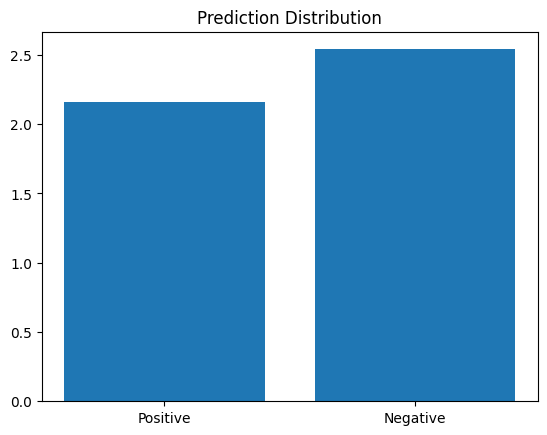

In [15]:
import numpy as np

for i in range(5):
  text = np.random.choice(data["test"]["text"])
  text_embeddings = tokenizer(text, return_tensors="tf", truncation=True, padding=True, max_length=512)
  output = model(text_embeddings)

  print("REVIEW: ", text)
  plt.bar(["Positive", "Negative"], [abs(output.logits[0][0]), abs(output.logits[0][1])])
  plt.title("Prediction Distribution")
  plt.show()

  print("="*120)